Dans ce notebook, on essaye de travailler sur le nettoyage des données (suppresion des points aberrants...)

In [40]:
# Quelques imports
import json
import pandas as pd
import matplotlib.pyplot as plt
import time

#Lecture du fichier
file = "Historique des positions raphael 090118.json"
df = pd.read_json(file)
#print(df)

donnee=df.get("locations")
#print(donnee)

#Récupération des latitudes, longitudes et des dates
latb=[donnee[0]["latitudeE7"]/1e7]
longb=[donnee[0]["longitudeE7"]/1e7]
temps=[donnee[0]["timestampMs"]]


#Version d'obtention brute
for i in range(len(donnee)):
    latb.append(donnee[i]["latitudeE7"]/1e7)
    longb.append(donnee[i]["longitudeE7"]/1e7)
    temps.append(donnee[i]["timestampMs"])

    
#Version nettoyage des donnees par différence de lat/long
for i in range(1,len(donnee)):
    la=donnee[i]["latitudeE7"]/1e7
    lo=donnee[i]["longitudeE7"]/1e7
    t=donnee[i]["timestampMs"]
    t1=donnee[i-1]["timestampMs"]
    t,t1=time.gmtime(float(t))[5],time.gmtime(float(t1))[5]
#on considère qu'en 15 secondes, on ne peut traverser le campus (varation longitude~2.5e-3 et variation longitude~4e-3)
#l'affichage des cartes ci-après montre la différence obtenue   
    if lo<=4.7775 and lo>=4.7650:
        if abs(t-t1)<=15 and (la-donnee[i-1]["latitudeE7"]/1e7)<=4e-3 and (lo-donnee[i-1]["longitudeE7"]/1e7)<=2.5e-3:
            lat.append(la)
            long.append(lo)
            temps.append(t)
    #elif abs(t-t1)>=5 and (la-donnee[i-1]["latitudeE7"]/1e7)>=0.005 and (lo-donnee[i-1]["longitudeE7"]/1e7)>=0.001:
    #    lat.append(la)
    #    long.append(lo)
     #   temps.append(t)

##Nettoyage par la mediane

n=2 ## la fenêtre glissante sera de taille 2n+1
lat_filtered=[0]*len(donnee) ## initialisation des tableaux
long_filtered=[0]*len(donnee)

for i in range(n, len(donnee)-n):
    lat_window=[]
    long_window=[]
    for j in range(i-n,i+n+1):
        lat_window.append(donnee[j]["latitudeE7"]/1e7)
        long_window.append(donnee[j]["longitudeE7"]/1e7)
    lat_window.sort()
    long_window.sort()

    lat_filtered[i] = lat_window[n]
    long_filtered[i] = long_window[n]
    
# Get current size
#fig_size = plt.rcParams["figure.figsize"]

Current size: [13.42, 12.0]


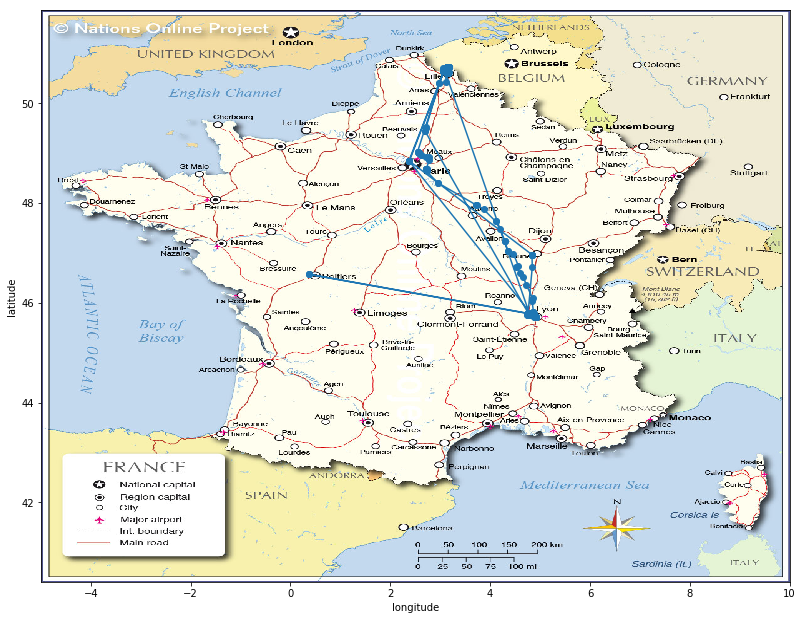

In [14]:
#plt.plot(long,lat)
plt.xlabel('longitude')
plt.ylabel('latitude')

# Get current size
fig_size = plt.rcParams["figure.figsize"]

###############################################################################
#
#   Affichage carte de France
#
###############################################################################

datafile = 'france-political-map.jpg'
img = plt.imread(datafile)

plt.plot(long,lat)

plt.scatter(long,lat,zorder=1)
plt.imshow(img, zorder=0, extent=[-5.0, 10,40.41, 51.86])

#Point bas droite 40.267598, 9.820620
#Point haut gauche 51.727552, -5.219663
#Ordre [left, right, bottom, top]

# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 13.42 and height to 12
fig_size[0] = 13.42
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()

# Affichage campus Lyon Ouest + Carrefour

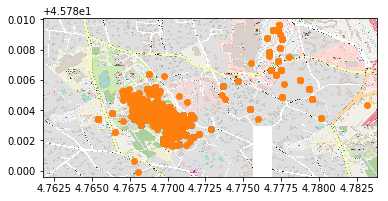

In [41]:
datafile2 = 'carte_centrale_grande.png'
img2 = plt.imread(datafile2)
plt.scatter(long,lat,zorder=1)
plt.scatter(longb,latb)
plt.imshow(img2,zorder=0,extent = [4.76175,4.78386,45.77960,45.79011])
plt.show()

# Point haut gauche de la carte centrale grande : 45.79011,4.76175
# Point bas : 45.77960,4.77183
# Point droite : 45.78609,4.78386

# Affichage Campus Centrale

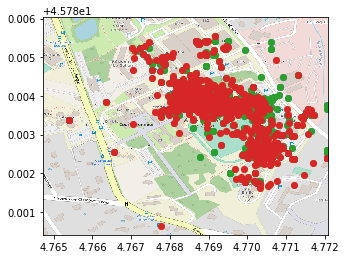

In [44]:
datafile3 = 'carte_centrale_petite.png'
img3 = plt.imread(datafile3)
plt.scatter(long_filtered,lat_filtered,zorder=1)
plt.scatter(longb,latb)
## Set figure width to 12 and height to 9
#plt.rcParams["figure.figsize"] = fig_size
#fig_size[0] = 6.84*1.4
#fig_size[1] = 7.55*1.4
plt.axis('normal')
plt.axis.xlim = 7.55*1.4
plt.axis.ylim = 6.84*1.4

plt.imshow(img3,zorder=0,extent = [4.76471,4.77209,45.78041,45.78603])
plt.show()

# Point haut droit carte centrale petite : 45.78603,4.77209
# Point bas gauche carte centrale petite : 45.78041,4.76471